In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sidetable as stb
#from sklearn.preprocessing import OneHotEncoder
import re 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [27]:
df = pd.read_csv("/home/adalaber/Escritorio/PROYECTO_2/2_Proceso_ETL/4_Analisis_exploratorio/preparadito.csv", index_col= 0)
df.head(2)

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company size,people_in_data,gender_2
0,910,50-54,Man,India,Bachelor’s degree,5-10 years,"Python, R","Local development environments (RStudio, Jupyt...",5-10 years,"Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",Other,"25,000-29,999",Manufacturing/Fabrication,NaN,3-4,Man
1,784,50-54,Man,Indonesia,Master’s degree,20+ years,"SQL, C, C++, Java","Advanced statistical software (SPSS, SAS, etc.)",< 1 year,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Program/Project Manager,"60,000-69,999",Manufacturing/Fabrication,NaN,1-2,Man


In [28]:
df["programming_language"].value_counts()

Python                                                                         4740
Python, SQL                                                                    2374
Python, R, SQL                                                                 1160
Python, R                                                                       955
Python, C++                                                                     707
Python, MATLAB                                                                  475
Python, C, C++                                                                  430
Python, Java                                                                    424
Python, Javascript                                                              413
Python, C                                                                       360
Python, SQL, Java                                                               333
Python, SQL, Javascript                                                     

In [35]:
df["programming_language"].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [30]:
x = df["programming_language"].str.split(",", expand = True)
x.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Python,R,None,None,None,None,None,None,None,None,None,None
1,SQL,C,C++,Java,None,None,None,None,None,None,None,None


In [31]:
x.head()
x.shape[0]

25973

In [32]:
cuenta = x[1].value_counts()
cuenta

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 1, dtype: int64

In [37]:
import re
def finder (col): 
    patron_python = r"[Pp]ython"
    patron_sql = r"[Ss][Qq][Ll]"
    patron_r = r"\b[R]\b"
    patron_java = r"[Jj]ava"or r"[Jj]avascript"
    patron_c = r"\b[C]\b"
    patron_c_mas = r"\b[C\+]\b"
    patron_bash = r"[Bb]ash"
    patron_matlab =  r"[Mm][Aa][Tt][Ll][Aa][Bb]"

    python_lista =[]
    sql_lista = []
    r_lista = []
    java_lista = []
    c_lista = []
    c_mas_lista = []
    bash_lista = []
    matlab_lista = []
    otros_lista = []

    try: 
        python_ = re.findall(patron_python, col)
        sql_ = re.findall(patron_sql, col)
        r_ = re.findall(patron_r, col)
        java_ = re.findall(patron_java, col)
        c_ = re.findall(patron_c, col)
        c_mas_ = re.findall(patron_c_mas, col)
        bash_ = re.findall(patron_bash, col)
        matlab_= re.findall(patron_matlab, col)
          
        if len(python_) != 0: 
            python_lista.append("X")
        if len(sql_) != 0:
            sql_lista.append("X")
        if len(r_) != 0:
            r_lista.append("X")
        if len(java_) != 0:
            java_lista.append("X")
        if len(c_) != 0:
            c_lista.append("X")
        if len(c_mas_) != 0:
            c_mas_lista.append("X")
        if len(bash_) != 0:
            bash_lista.append("X")  
        if len(matlab_) != 0:
            matlab_lista.append("X")       
        
        else:
            otros_lista.append("X")

    except:
        pass
                
    diccionario_leng = {"Python" : python_lista, "SQL" : sql_lista, "R": r_lista, "Java / Javascript": java_lista, "C": c_lista, "C++": c_mas_lista, "Bash": bash_lista, "Matlab": matlab_lista, "Otros": otros_lista}
    return diccionario_leng

In [38]:
df["lenguajes"] = df["programming_language"].apply(finder)


In [39]:
lenguajes = df["lenguajes"].apply(pd.Series)
lenguajes.head(2)

,Python,SQL,R,Java / Javascript,C,C++,Bash,Matlab,Otros
0,[X],[],[X],[],[],[],[],[],[X]
1,[],[X],[],[X],[X],[X],[],[],[X]


In [40]:
df_lenguajes = pd.DataFrame(lenguajes)

In [ ]:
df_lenguajes.columns

Index(['Python', 'SQL', 'R', 'Java / Javascript', 'C', 'C++', 'Bash', 'Matlab',
       'Otros'],
      dtype='object')

In [ ]:
for col in df_lenguajes.columns:
    a = df_lenguajes[col].value_counts()
    print(a)

[X]    21860
[]      4113
Name: Python, dtype: int64
[]     15217
[X]    10756
Name: SQL, dtype: int64
[]     20639
[X]     5334
Name: R, dtype: int64
[]     18656
[X]     7317
Name: Java / Javascript, dtype: int64
[]     18513
[X]     7460
Name: C, dtype: int64
[]     18513
[X]     7460
Name: C++, dtype: int64
[]     23757
[X]     2216
Name: Bash, dtype: int64
[]     23038
[X]     2935
Name: Matlab, dtype: int64
[X]    22006
[]      3967
Name: Otros, dtype: int64


In [ ]:
diccionario_totales = {} 
usuarios_python = df_lenguajes["Python"].value_counts()[0]
usuarios_sql = df_lenguajes["SQL"].value_counts()[1]
usuarios_r = df_lenguajes["R"].value_counts()[1]
usuarios_java = df_lenguajes["Java / Javascript"].value_counts()[1]
usuarios_c = df_lenguajes["C"].value_counts()[1]
usuarios_cmas = df_lenguajes["C++"].value_counts()[1]
usuarios_bash = df_lenguajes["Bash"].value_counts()[1]
usuarios_matlab= df_lenguajes["Matlab"].value_counts()[1]
usuarios_otros = df_lenguajes["Otros"].value_counts()[0]

diccionario_totales = {"Python" : usuarios_python, "SQL" : usuarios_sql, "R": usuarios_r, "Java / Javascript": usuarios_java , "C": usuarios_c, "C++": usuarios_cmas, "Bash": usuarios_bash, "Matlab": usuarios_matlab, "Otros": usuarios_otros}


In [ ]:
diccionario_totales

{'Python': 21860,
 'SQL': 10756,
 'R': 5334,
 'Java / Javascript': 7317,
 'C': 7460,
 'C++': 7460,
 'Bash': 2216,
 'Matlab': 2935,
 'Otros': 22006}

In [ ]:
diccionario_totales.keys()

dict_keys(['Python', 'SQL', 'R', 'Java / Javascript', 'C', 'C++', 'Bash', 'Matlab', 'Otros'])

In [ ]:
diccionario_totales.values()

dict_values([21860, 10756, 5334, 7317, 7460, 7460, 2216, 2935, 22006])

In [ ]:
total = pd.DataFrame()
total["programa"] = diccionario_totales.keys()
total["usuarios"] = diccionario_totales.values()

NameError: name 'diccionario_totales' is not defined

In [ ]:
total

NameError: name 'total' is not defined

In [ ]:
total["porcentaje sobre el total"] = total["usuarios"].apply(lambda x: (x / df.shape[0] * 100))
 
total

NameError: name 'total' is not defined

In [ ]:
ordenado = total["porcentaje sobre el total"].sort_values(ascending = False).droprow(8)
ordenado.index



NameError: name 'total' is not defined

In [ ]:
total = total.reindex([0, 1, 4, 5, 3, 2, 7, 6, 8])

<Figure size 720x720 with 0 Axes>

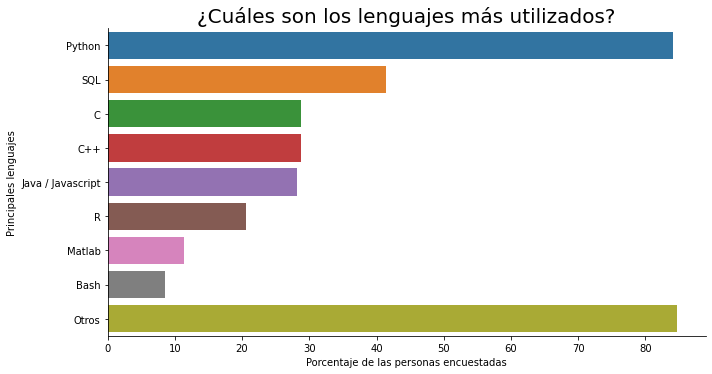

In [ ]:
plt.figure(figsize =(10, 10))

fig = sns.catplot(y='programa', x ='porcentaje sobre el total', data = total, kind = "bar", aspect=2)

fig.set(xlabel = "Porcentaje de las personas encuestadas", ylabel = "Principales lenguajes")


plt.title('¿Cuáles son los lenguajes más utilizados?', fontsize=20)

plt.show()

In [ ]:
columns = ["Python" , "SQL" , "Java / Javascript", "C", "C++", "Bash", "Matlab", "Otros"])